# Do You Smell It

Vor-Corona Test

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Laut [usmellit.com](https://www.usmellit.com/de/die-wissenschaft/) verlieren 85% der mit dem Coronavirus infizierten Menschen des Geruchssinn.

In [9]:
nyx = 0.85  # p(nichts riechen|corona) = 85%

Laut [hno-aerzte-im-netz.de](https://www.hno-aerzte-im-netz.de/krankheiten/riechstoerungen/definition-und-haeufigkeit.html) leiden 5% der Bundesbürger an einer Anosmie (Verlust des Geruchssinn).

In [10]:
nynx = 0.05  # p(nichts riechen|nicht corona)

Die Frage ist, wie hoch ist die Wahrscheinlichkeit, dass jemand der nichts mehr riecht an Corona leidet. Das hängt aber von der Anzahl der tatsächlich infizierten Menschen ab (Prävalenz).
$$p(corona|\neg riechen) = \frac{p(\neg riechen|corona)p(corona)}{p(\neg riechen|corona)p(corona)+p(\neg riechen|\neg corona)p(\neg corona)}$$
Das [RKI](https://rp-online.de/panorama/coronavirus/aktuelle-corona-zahlen-deutschland-fallzahlen-von-heute-06022021_aid-49723937) schätzt, dass etwa 200.000 Menschen in Deutschland aktiv mit Covid-19 infiziert sind (Stand: 06.02.2021); in Deutschland leben aktuell etwa 83.000.000 Menschen ([destatis](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsstand/_inhalt.html)).

In [88]:
def xny(x):  # p(corona|nichts riechen)
    return (nyx * x) / (nyx * x + nynx * (1-x))

def nxy(x):  # p(nicht corona|riechen)
    return 1-((1-nyx) * x) / ((1-nyx) * x + (1-nynx) * (1-x))

In [82]:
xs = np.arange(0, 0.02, 0.005)
ys = np.array(list(map(xny, xs)))
x = 200000/83000000

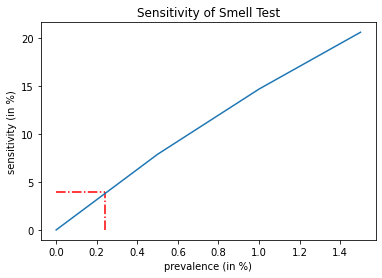

In [83]:
fig, ax = plt.subplots()
ax.plot(xs*100, ys*100)
ax.set_title('Sensitivity of Smell Test')
ax.set_ylabel('sensitivity (in %)')
ax.set_xlabel('prevalence (in %)')
ax.vlines(x*100, 0, xny(x)*100, colors='r', linestyles='-.')
ax.hlines(xny(x)*100, 0, x*100, colors='r', linestyles='-.');

In [89]:
xs = np.arange(0, 0.02, 0.005)
ys = np.array(list(map(nxy, xs)))

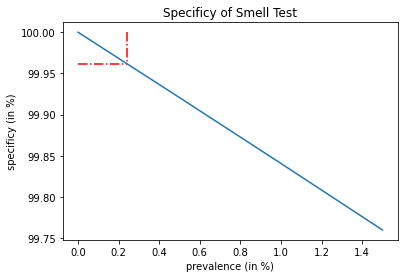

In [92]:
fig, ax = plt.subplots()
ax.plot(xs*100, ys*100)
ax.set_title('Specificy of Smell Test')
ax.set_ylabel('specificy (in %)')
ax.set_xlabel('prevalence (in %)')
ax.vlines(x*100, 100, nxy(x)*100, colors='r', linestyles='-.')
ax.hlines(nxy(x)*100, 0, x*100, colors='r', linestyles='-.');